In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'ieee', 'grid', 'no-latex'])
plt.rcParams['savefig.facecolor'] = (1.0, 1.0, 1.0, 1.0)
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 1.0)
plt.rcParams['figure.figsize'] = 15, 5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['legend.title_fontsize'] = 'large'
import pandas as pd
import pickle

data = {}

with open("data_boston.pickle", 'rb') as f:
    data = pickle.load(f)
    
dict_gp_ard_boston = data['dict_gp_ard']
dict_lime_boston = data['dict_lime']

with open("data_breast_cancer.pickle", 'rb') as f:
    data = pickle.load(f)
    
dict_gp_ard_breast_cancer = data['dict_gp_ard']
dict_lime_breast_cancer = data['dict_lime']

In [2]:
def mean_std(dict_lime, dict_gp_ard):
    mean_std_lime = []
    mean_std_gp_ard = []

    for val in dict_lime:
        if val!=50:
            mean_std_lime.append(np.mean(np.std(np.abs(list(dict_lime[val].values())),axis=1)))
            mean_std_gp_ard.append(np.mean(np.std(np.abs(list(dict_gp_ard[val].values())),axis=1)))
    return mean_std_lime, mean_std_gp_ard

num_samples_list = [50, 100, 200, 250, 300, 350, 400, 450, 500]


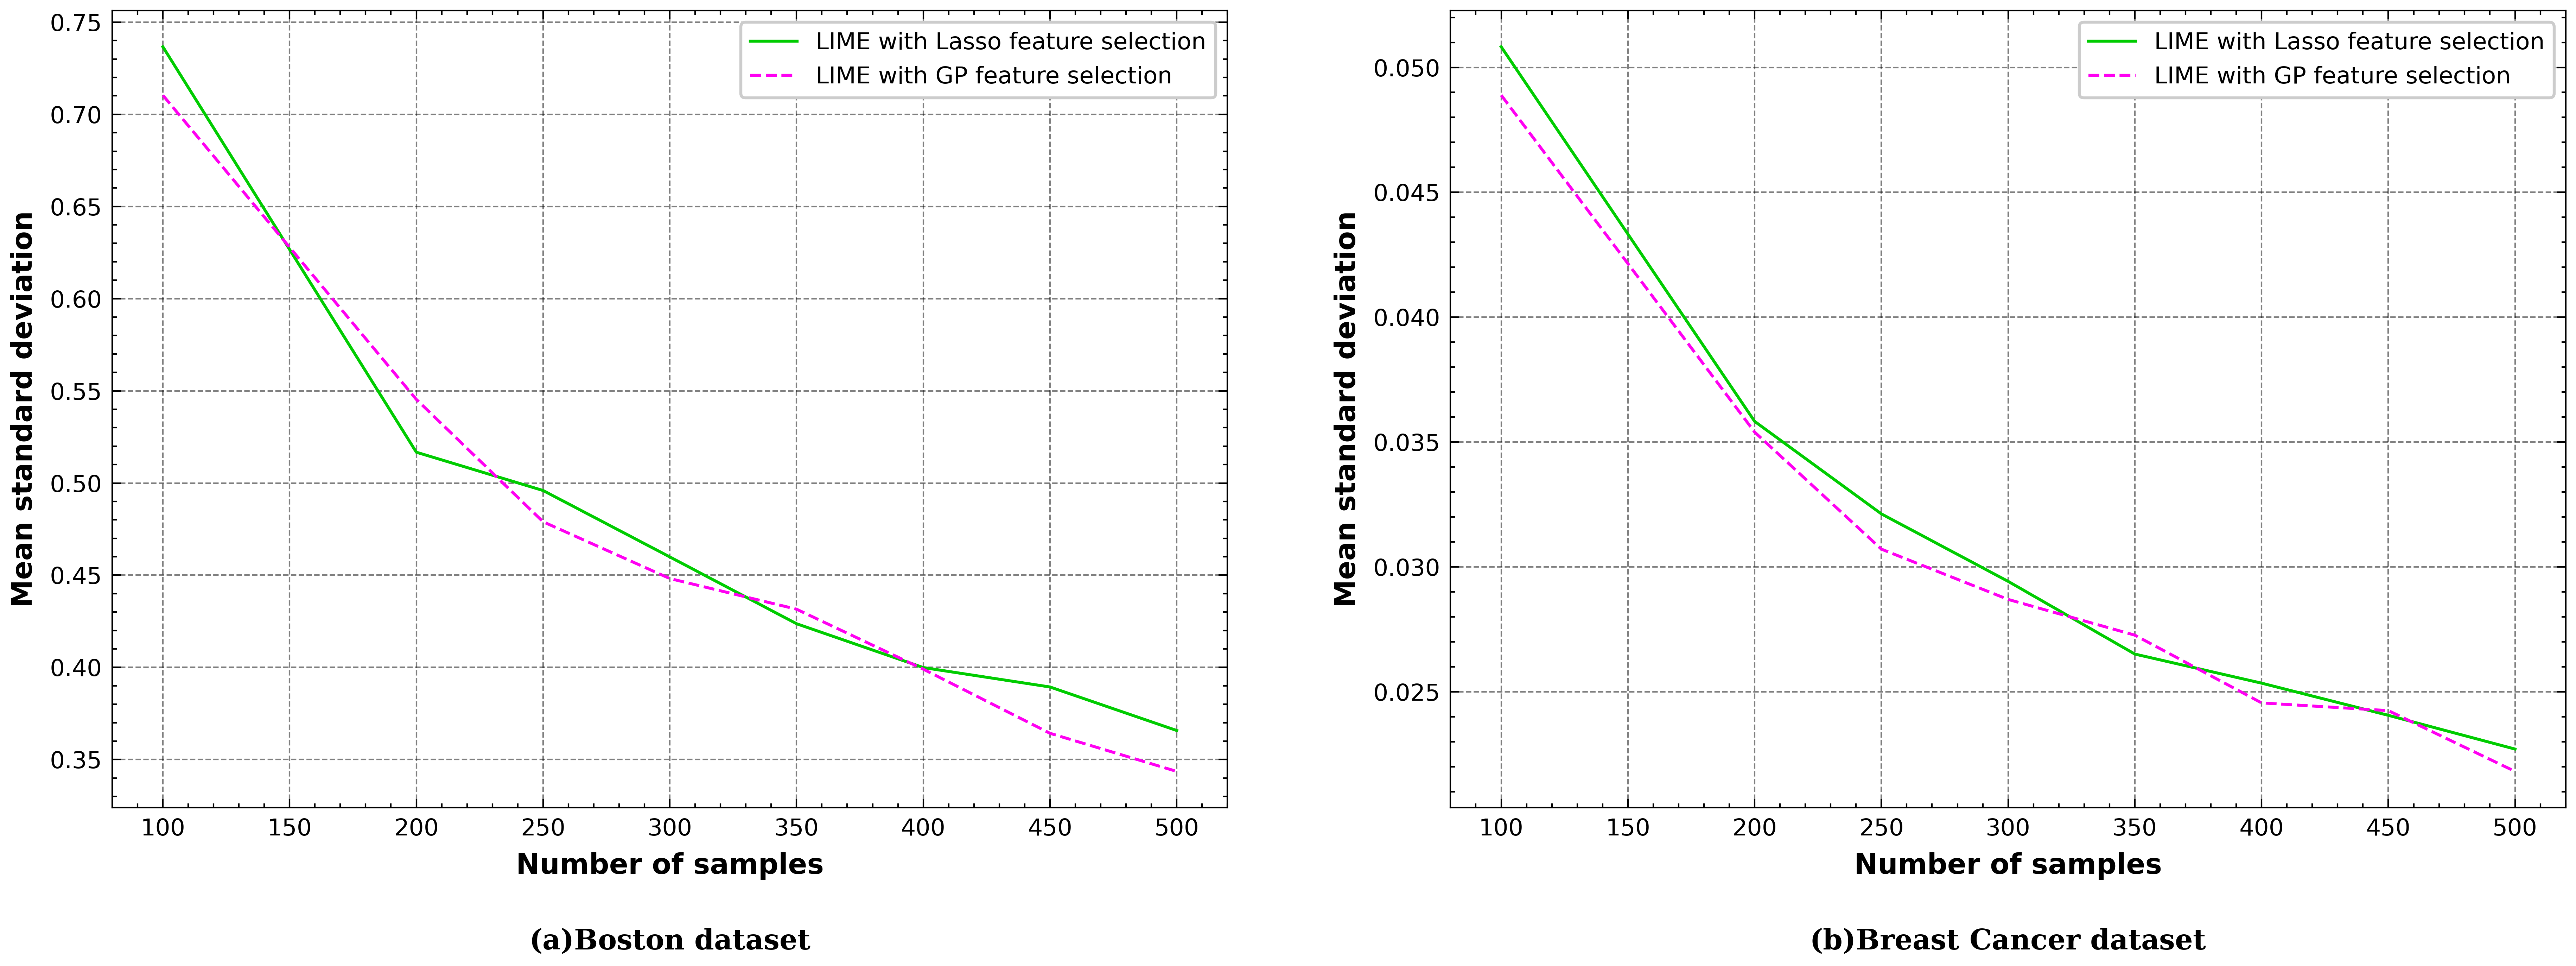

In [8]:
[boston_lime, boston_gp] = mean_std(dict_lime_boston, dict_gp_ard_boston)
[breast_cancer_lime, breast_cancer_gp] = mean_std(dict_lime_breast_cancer, dict_gp_ard_breast_cancer)

plt.subplot(1,2,1)
plt.plot(num_samples_list[1:],boston_lime,label="LIME with Lasso feature selection", color='#00CC00')
plt.plot(num_samples_list[1:],boston_gp,label="LIME with GP feature selection",color = '#FF00F2')
plt.legend()
plt.xlabel("Number of samples")
plt.ylabel("Mean standard deviation")
plt.title(r"$\bf{(a)Boston\ dataset}$", y=-0.2)


plt.subplot(1,2,2)
plt.plot(num_samples_list[1:],breast_cancer_lime,label="LIME with Lasso feature selection",color='#00CC00')
plt.plot(num_samples_list[1:],breast_cancer_gp,label="LIME with GP feature selection",linewidth=1, color = '#FF00F2')
plt.legend()
plt.xlabel("Number of samples")
plt.ylabel("Mean standard deviation")
plt.title(r"$\bf{(b)Breast\ Cancer\ dataset}$", y=-0.2)

plt.savefig("Stability.png", dpi=600)

In [7]:
!start .